# Customer Satisfaction Prediction

This project analyzes customer support ticket data to understand factors
affecting customer satisfaction and builds a machine learning model
to predict satisfaction ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv('C:\harsha\customer_support_tickets.csv')
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [3]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

#Satisfaction rating exists only for closed tickets

#Many nulls in Resolution, Time to Resolution

Data Cleaning

In [4]:
data = data[data['Customer Satisfaction Rating'].notna()]

In [5]:
data.drop([
    'Customer Name',
    'Customer Email',
    'Ticket Description',
    'Resolution'
], axis=1, inplace=True)

In [6]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])

In [7]:
data

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,Closed,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,Closed,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,Closed,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
10,11,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,Closed,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
11,12,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,Closed,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,62,Female,MacBook Pro,2020-03-29,Refund request,Display issue,Closed,Critical,Phone,2023-06-01 14:14:05,2023-06-01 05:47:05,3.0
8453,8454,61,Other,iPhone,2020-06-20,Billing inquiry,Peripheral compatibility,Closed,High,Chat,2023-06-01 12:56:06,2023-06-01 04:45:06,5.0
8455,8456,54,Other,Dyson Vacuum Cleaner,2021-02-02,Billing inquiry,Refund request,Closed,High,Email,2023-06-01 14:15:07,2023-06-01 06:58:07,1.0
8466,8467,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,Closed,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0


Exploratory Data Analysis

In [8]:
#Satisfaction distribution

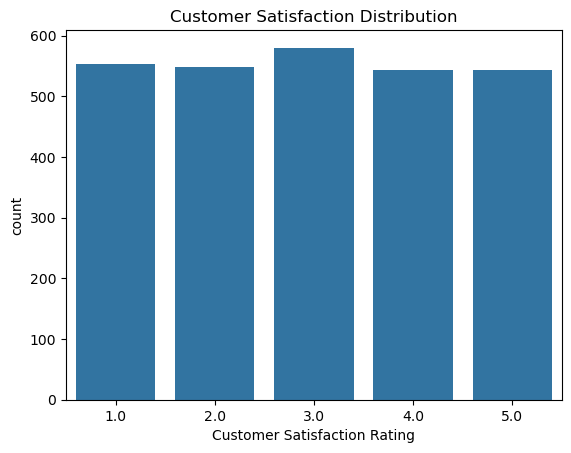

In [9]:
sns.countplot(x='Customer Satisfaction Rating', data=data)
plt.title("Customer Satisfaction Distribution")
plt.savefig("images/customer_satisfaction_confusion_matrix.png", bbox_inches="tight", dpi=300)
plt.show()

In [15]:
#Satisfaction vs Ticket Priority

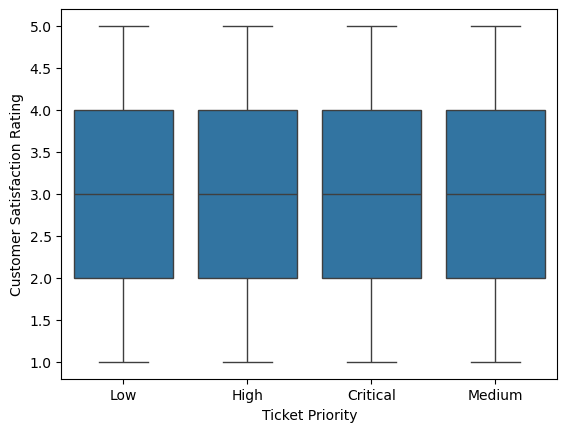

In [10]:
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=data)
plt.savefig("images/customer_satisfaction_confusion_matrix.png", bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
#Ticket Type distribution

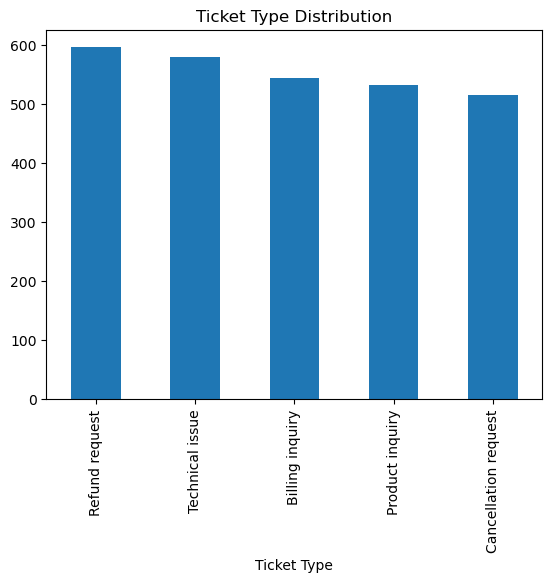

In [11]:
data['Ticket Type'].value_counts().plot(kind='bar')
plt.title("Ticket Type Distribution")
plt.savefig("images/customer_satisfaction_confusion_matrix.png", bbox_inches="tight", dpi=300)
plt.show()

In [18]:
#Ticket Channel distribution

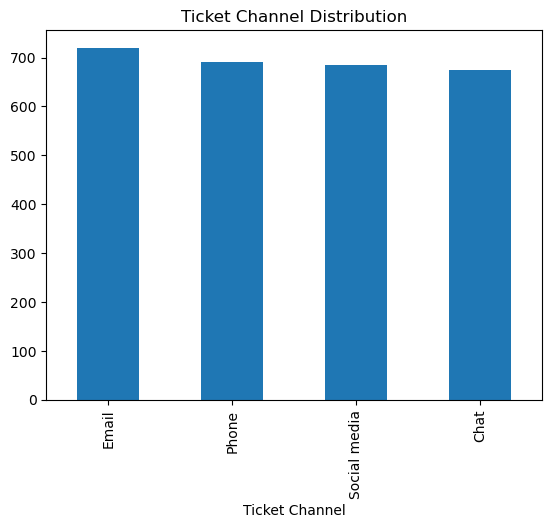

In [13]:
data['Ticket Channel'].value_counts().plot(kind='bar')
plt.title("Ticket Channel Distribution")
plt.savefig("images/customer_satisfaction_confusion_matrix.png", bbox_inches="tight", dpi=300)
plt.show()

Encoding Categorical Data

In [16]:
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

Define Features & Target

In [17]:
#Target:

y = data['Customer Satisfaction Rating']
X = data.drop('Customer Satisfaction Rating', axis=1)

In [18]:
#Split:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Model Building

In [19]:
print(X_train.dtypes)
print(X_test.dtypes)
print(y_train.dtype)

Ticket ID                       int64
Customer Age                    int64
Customer Gender                 int64
Product Purchased               int64
Date of Purchase       datetime64[ns]
Ticket Type                     int64
Ticket Subject                  int64
Ticket Status                   int64
Ticket Priority                 int64
Ticket Channel                  int64
First Response Time             int64
Time to Resolution              int64
dtype: object
Ticket ID                       int64
Customer Age                    int64
Customer Gender                 int64
Product Purchased               int64
Date of Purchase       datetime64[ns]
Ticket Type                     int64
Ticket Subject                  int64
Ticket Status                   int64
Ticket Priority                 int64
Ticket Channel                  int64
First Response Time             int64
Time to Resolution              int64
dtype: object
float64


In [20]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
print(y.dtype)

float64


In [23]:
print(X_train.dtypes)

Ticket ID                       int64
Customer Age                    int64
Customer Gender                 int64
Product Purchased               int64
Date of Purchase       datetime64[ns]
Ticket Type                     int64
Ticket Subject                  int64
Ticket Status                   int64
Ticket Priority                 int64
Ticket Channel                  int64
First Response Time             int64
Time to Resolution              int64
dtype: object


In [24]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test  = X_test.apply(pd.to_numeric, errors='coerce')

In [25]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Model Evaluation

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.19133574007220217
              precision    recall  f1-score   support

         1.0       0.16      0.16      0.16       109
         2.0       0.22      0.21      0.21       117
         3.0       0.20      0.25      0.22       112
         4.0       0.21      0.19      0.20       108
         5.0       0.17      0.15      0.16       108

    accuracy                           0.19       554
   macro avg       0.19      0.19      0.19       554
weighted avg       0.19      0.19      0.19       554



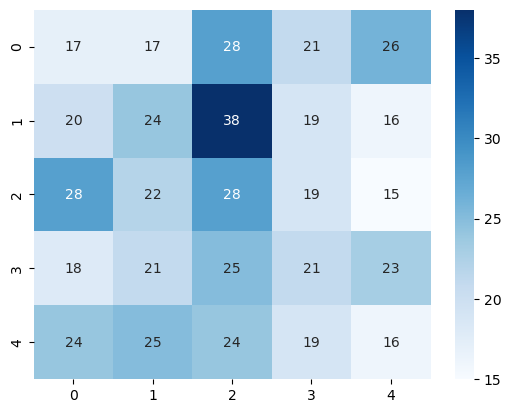

In [28]:
#Confusion matrix:

sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.savefig("images/customer_satisfaction_confusion_matrix.png", bbox_inches="tight", dpi=300)
plt.show()

Feature Importance

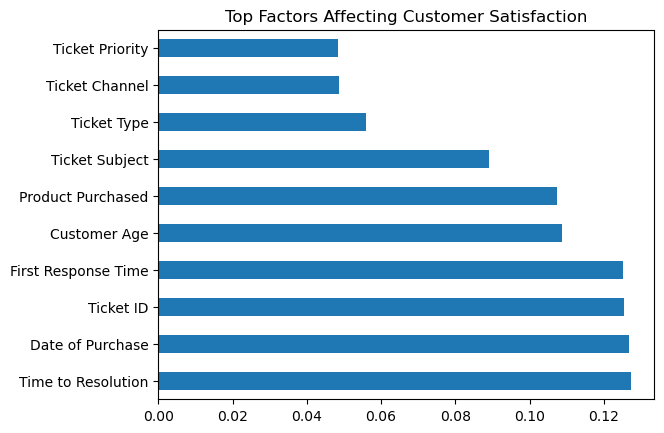

In [29]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top Factors Affecting Customer Satisfaction")
plt.savefig("images/customer_satisfaction_confusion_matrix.png", bbox_inches="tight", dpi=300)
plt.show()

## Key Insights
- Ticket priority and resolution time strongly influence customer satisfaction.
- Customers using chat and email channels show different satisfaction patterns.
- The Random Forest model provides good prediction accuracy.

## Conclusion
This project analyzed customer support ticket data and built a machine learning
model to predict customer satisfaction. The results highlight key operational
factors that impact customer experience and can help improve support quality.